## Traffic incidents in Poland under the influence of alcohol (traffic accident perpetrator  driver age pl) 2016-2022


### 1. data exploration

In [21]:
topicName = 'traffic-accident-perpetrator-age-pl'
fileName = 'traffic-perpetrator-age-pl'
sourceFileExt = 'zip'

In [22]:
import pandas as pd

original_data_path = '../data/raw/traffic-accident-perpetrator-age-pl/2016.csv'

df = pd.read_csv(original_data_path, encoding='iso-8859-1', sep=';')

df.head(10)

,Wiek,Liczba wypadków,Liczba zabitych,Liczba rannych,Liczba kolizji
0,1: 0-6,14,0,15,40
1,2: 7-14,334,14,339,651
2,3: 15-17,312,23,353,949
3,4: 18-24,5823,542,7790,60877
4,5: 25-39,9491,744,12020,112010
5,6: 40-59,7486,573,9135,91890
6,7: 60 plus,4343,370,5100,50484
7,b/d,1278,18,1398,30944
8,Podsumowanie ca³kowite,29081,2284,36150,347845


In [23]:
column_names_descriptions = {
    0: ('year', 'year', 'rok'),
    1: ('accidents0to6', '0 to 6 years', '0 do 6 lat'),
    2: ('accidents7to14', "7 to 14 years", '7 do 14 lat'),
    3: ('accidents15to17', "15 to 17 years", '15 do 17 lat'),
    4: ('accidents18to24', '18 to 24 years', '18 do 24 lat'),
    5: ('accidents25to39', "25 to 39 years", '25 do 29 lat'),
    6: ('accidents40to59', "40 to 59 years", '40 do 59 lat'),
    7: ('accidents60plus', '60+ years', '60+ lat'),
    8: ('accidentsNoData', "no data", 'brak danych')
}

def addData(dictionary: dict, key: int, old_word: str, new_word: str):
    dictionary[x] = dictionary[x-8]
    dictionary[x] = (dictionary[x][0].replace(old_word, new_word),dictionary[x][1], dictionary[x][2])

for x in range(9,17):
    addData(column_names_descriptions, x,  'accidents', 'killed')
  
for x in range(17,25):
    addData(column_names_descriptions, x,  'killed', 'wounded')
  
for x in range(25,33):
    addData(column_names_descriptions, x,  'wounded','collision')

new_column_names = [t[0] for t in column_names_descriptions.values()]

len(new_column_names)

33

- last is deleted as it contains sum of columns - data duplication

In [24]:
df.drop(columns="Wiek", axis=1, inplace=True)

In [25]:
df = df[:8]

df

,Liczba wypadków,Liczba zabitych,Liczba rannych,Liczba kolizji
0,14,0,15,40
1,334,14,339,651
2,312,23,353,949
3,5823,542,7790,60877
4,9491,744,12020,112010
5,7486,573,9135,91890
6,4343,370,5100,50484
7,1278,18,1398,30944


In [26]:
melted_df = pd.melt(df, id_vars=None, var_name='Metric', value_name='Value')
melted_df.Value.values

array([    14,    334,    312,   5823,   9491,   7486,   4343,   1278,
            0,     14,     23,    542,    744,    573,    370,     18,
           15,    339,    353,   7790,  12020,   9135,   5100,   1398,
           40,    651,    949,  60877, 112010,  91890,  50484,  30944])

### 2. Columns names & descriptions

In [27]:
df = pd.DataFrame(columns=new_column_names)

In [28]:
import numpy as np


for index, year  in enumerate(range(2016,2023)):
    original_data_path = f'../data/raw/traffic-accident-perpetrator-age-pl/{year}.csv'
    temp_df = pd.read_csv(original_data_path, encoding='iso-8859-1', sep=';')
    temp_df = temp_df[:8]
    temp_df.drop(columns="Wiek", axis=1, inplace=True)
    temp_df = pd.melt(temp_df, id_vars=None, var_name='Metric', value_name='Value')
    temp_values = np.insert(temp_df.Value.values,0,year).astype(int)
    df.loc[index] = temp_values

df
    

,year,accidents0to6,accidents7to14,accidents15to17,accidents18to24,accidents25to39,accidents40to59,accidents60plus,accidentsNoData,killed0to6,...,wounded60plus,woundedNoData,collision0to6,collision7to14,collision15to17,collision18to24,collision25to39,collision40to59,collision60plus,collisionNoData
0,2016,14,334,312,5823,9491,7486,4343,1278,0,...,5100,1398,40,651,949,60877,112010,91890,50484,30944
1,2017,14,300,272,5550,9230,7328,4428,1237,1,...,5173,1369,39,723,970,61605,115873,97735,55401,35960
2,2018,15,322,304,5113,8726,7308,4537,1231,0,...,5153,1333,43,784,980,61089,115956,99220,58368,37362
3,2019,11,289,276,4910,8326,7142,4465,1115,0,...,5162,1189,33,697,920,61645,118205,101714,62376,39069
4,2020,5,201,223,3774,6699,5699,3478,920,0,...,3802,998,39,573,783,51537,99926,86311,52337,31830
5,2021,3,250,209,3653,6546,5682,3418,862,0,...,3843,924,22,643,836,56027,110161,97456,57955,38225
6,2022,12,269,200,3059,5855,5600,3551,827,2,...,4027,894,22,714,908,43053,89107,82411,51403,38290


In [29]:
df.transpose()

,0,1,2,3,4,5,6
year,2016,2017,2018,2019,2020,2021,2022
accidents0to6,14,14,15,11,5,3,12
accidents7to14,334,300,322,289,201,250,269
accidents15to17,312,272,304,276,223,209,200
accidents18to24,5823,5550,5113,4910,3774,3653,3059
accidents25to39,9491,9230,8726,8326,6699,6546,5855
accidents40to59,7486,7328,7308,7142,5699,5682,5600
accidents60plus,4343,4428,4537,4465,3478,3418,3551
accidentsNoData,1278,1237,1231,1115,920,862,827
killed0to6,0,1,0,0,0,0,2


### 3. create db tables

In [30]:
from src.database.connect_db import connect_db

db = connect_db()

cursor = db.cursor()


In [31]:
MAIN_TABLE_NAME = 'trafficAccidentsPerpetratorDriversAgePl'

In [32]:
query = f"CREATE TABLE {MAIN_TABLE_NAME} (year INT PRIMARY KEY, "

for column in df.columns[1:]:
    query += f"{column} INT NOT NULL, "


query = query[:-2] + ")"

In [33]:
try:
    cursor.execute(query)
except:
    print('table already created')

table already created


In [34]:
data = [tuple(row) for index, row in df.iterrows()]

In [35]:
query = f"""
INSERT INTO {MAIN_TABLE_NAME} ({', '.join(df.columns)}) 
VALUES ({', '.join(['%s']*len(df.columns))});
"""

try:
    cursor.executemany(query, data)
except:
    print('data added already')

data added already


In [36]:
cursor.execute(f"""
               SELECT year, accidents40to59
               FROM {MAIN_TABLE_NAME}
               """)
cursor.fetchall()


((2016, 7486),
 (2017, 7328),
 (2018, 7308),
 (2019, 7142),
 (2020, 5699),
 (2021, 5682),
 (2022, 5600))

In [37]:
from src.database.create_ds_desc_table import create_ds_desc_table


create_ds_desc_table(MAIN_TABLE_NAME)

An error occurred: (1050, 'target: legal-charts-dev.-.primary: vttablet: rpc error: code = AlreadyExists desc = Table \'trafficAccidentsPerpetratorDriversAgePlDesc\' already exists (errno 1050) (sqlstate 42S01) (CallerID: dwxslyebsjlgo852x54a): Sql: "create table trafficAccidentsPerpetratorDriversAgePlDesc (\\n\\tcolumn_name VARCHAR(255),\\n\\tdescription VARCHAR(255) not null,\\n\\tdescriptionPl VARCHAR(255) not null,\\n\\tPRIMARY KEY (column_name)\\n)", BindVars: {REDACTED}')


In [38]:
data = [row for row in column_names_descriptions.values()]

In [39]:
from src.database.insert_into_ds_desc import insert_into_ds_desc


insert_into_ds_desc(MAIN_TABLE_NAME,data)

data added already
An error occurred: (1062, 'target: legal-charts-dev.-.primary: vttablet: rpc error: code = AlreadyExists desc = Duplicate entry \'year\' for key \'trafficAccidentsPerpetratorDriversAgePlDesc.PRIMARY\' (errno 1062) (sqlstate 23000) (CallerID: dwxslyebsjlgo852x54a): Sql: "insert into trafficAccidentsPerpetratorDriversAgePlDesc(column_name, description, descriptionPl) values (:vtg1 /* VARCHAR */, :vtg2 /* VARCHAR */, :vtg3 /* VARCHAR */), (:vtg4 /* VARCHAR */, :vtg5 /* VARCHAR */, :vtg6 /* VARCHAR */), (:vtg7 /* VARCHAR */, :vtg8 /* VARCHA')


### 4. upload files to GCP storage

In [40]:
df_desc = pd.DataFrame(data, 
    columns=['column_name', 
    'description', 
    'descriptionPl'])

In [41]:
df_path = f'../data/processed/{topicName}/{fileName}.csv'
df_path_desc =f'../data/processed/{topicName}/{fileName}-desc.csv'

In [42]:
df.to_csv(df_path, index=False)
df_desc.to_csv(df_path_desc, index=False)

In [43]:
destination = f"{topicName}/{fileName}.csv"
destination_desc = f"{topicName}/{fileName}-desc.csv"
destination_original = f"{topicName}/{fileName}-source.{sourceFileExt}"

In [44]:
from src.utils.upload_file_gpc import upload_file
from src.utils.zip_folder import zip_folder

original_data_path = '../data/raw/traffic-accident-perpetrator-age-pl/'  
output_path = f'../data/raw/traffic-accident-perpetrator-age-pl.zip'

zip_folder(original_data_path,output_path)


upload_file(df_path,destination)
upload_file(df_path,destination_desc)
upload_file(output_path,destination_original)

File ../data/processed/traffic-accident-perpetrator-age-pl/traffic-perpetrator-age-pl.csv uploaded to legal-charts-datasets/traffic-accident-perpetrator-age-pl/traffic-perpetrator-age-pl.csv.
File ../data/processed/traffic-accident-perpetrator-age-pl/traffic-perpetrator-age-pl.csv uploaded to legal-charts-datasets/traffic-accident-perpetrator-age-pl/traffic-perpetrator-age-pl-desc.csv.
File ../data/raw/traffic-accident-perpetrator-age-pl.zip uploaded to legal-charts-datasets/traffic-accident-perpetrator-age-pl/traffic-perpetrator-age-pl-source.zip.


### 5. data intro

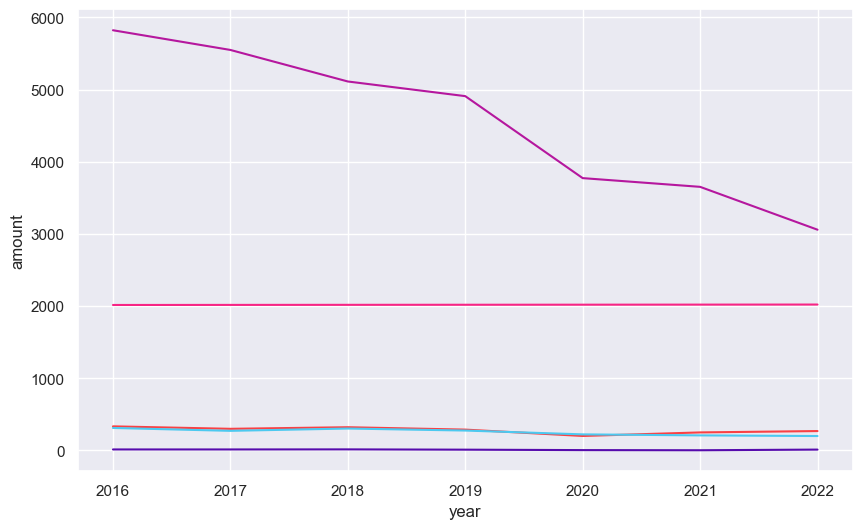

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils.sns_pallete import palette
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.set_palette(palette)

for y in df.columns[:5]:
    sns.lineplot(data=df, x='year', y=y)
    
plt.xlabel('year')
plt.ylabel('amount')
plt.grid(True)
plt.show()


In [46]:
db.close()